# 1. Import and Install Dependencies

!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

pip install opencv-python


pip install mediapipe


!python -m pip install --upgrade pip


!pip install tensorflow


!pip install mediapipe


# 2. Keypoints using MP Holistic

In [ ]:
import sys
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic


In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

With selected face points

In [4]:
from mediapipe.framework.formats import landmark_pb2

In [5]:
# 初始化 MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

expanded_landmarks_indices = (
    # list(range(30, 60))   # 右嘴 face
    # +list(range(267, 287))  # left mouth face
    #list(range(1, 6))  # 鼻梁
    #list(range(8, 16))  # middle mouth
    #list(range(61, 66))   # left eye brow
    list(range(300, 310))  # 嘴唇内侧和边缘
) 

# 生成只包含所选面部关键点的新 LandmarkList
def create_filtered_face_landmarks(results):
    if not results.face_landmarks:
        return None
    # 提取指定索引的关键点
    filtered_landmarks = [results.face_landmarks.landmark[idx] for idx in expanded_landmarks_indices]
    
    # 创建新的 NormalizedLandmarkList 结构
    face_landmarks_subset = landmark_pb2.NormalizedLandmarkList(landmark=filtered_landmarks)
    return face_landmarks_subset

# 使用 MediaPipe 处理关键点
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # 转换颜色空间
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)

        # 创建一个自定义的结果结构
        custom_results = {
            'filtered_face_landmarks': create_filtered_face_landmarks(results),
            'pose_landmarks': results.pose_landmarks,
            'left_hand_landmarks': results.left_hand_landmarks,
            'right_hand_landmarks': results.right_hand_landmarks
        }

        # 绘制关键点
        if custom_results['filtered_face_landmarks']:
            mp_drawing.draw_landmarks(
                frame,
                custom_results['filtered_face_landmarks'],
                None,  # 不使用连接线
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
            )

        if custom_results['pose_landmarks']:
            mp_drawing.draw_landmarks(
                frame, custom_results['pose_landmarks'], mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4), 
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )
        
        if custom_results['left_hand_landmarks']:
            mp_drawing.draw_landmarks(
                frame, custom_results['left_hand_landmarks'], mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
                mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
            )
        
        if custom_results['right_hand_landmarks']:
            mp_drawing.draw_landmarks(
                frame, custom_results['right_hand_landmarks'], mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4), 
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

        # 显示结果
        cv2.imshow('Custom Results Feed', frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

C:\Users\Bill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [16]:
if custom_results['filtered_face_landmarks']:
    num_landmarks = len(custom_results['filtered_face_landmarks'].landmark)
    print("Filtered face landmarks count:", num_landmarks)
else:
    print("No filtered face landmarks found.")


Filtered face landmarks count: 210


In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

In [10]:
results.face_landmarks

landmark {
  x: 0.502978504
  y: 0.50777781
  z: -0.0113590723
}
landmark {
  x: 0.504318118
  y: 0.476685345
  z: -0.0298879407
}
landmark {
  x: 0.502421
  y: 0.483959168
  z: -0.0135390218
}
landmark {
  x: 0.496944934
  y: 0.437642545
  z: -0.0266747754
}
landmark {
  x: 0.504297078
  y: 0.465788126
  z: -0.0328597389
}
landmark {
  x: 0.503398
  y: 0.449764729
  z: -0.0320583
}
landmark {
  x: 0.500218809
  y: 0.408458352
  z: -0.0207821596
}
landmark {
  x: 0.454329282
  y: 0.404201627
  z: -0.00432582805
}
landmark {
  x: 0.498924613
  y: 0.379669249
  z: -0.0202536173
}
landmark {
  x: 0.498707473
  y: 0.364615768
  z: -0.0232888255
}
landmark {
  x: 0.496158034
  y: 0.308070183
  z: -0.0237115677
}
landmark {
  x: 0.503011763
  y: 0.512994111
  z: -0.00990597159
}
landmark {
  x: 0.502742589
  y: 0.516578794
  z: -0.00746242423
}
landmark {
  x: 0.502392471
  y: 0.517539203
  z: -0.00450049294
}
landmark {
  x: 0.502748132
  y: 0.519374
  z: -0.00269772415
}
landmark {
  x: 0.

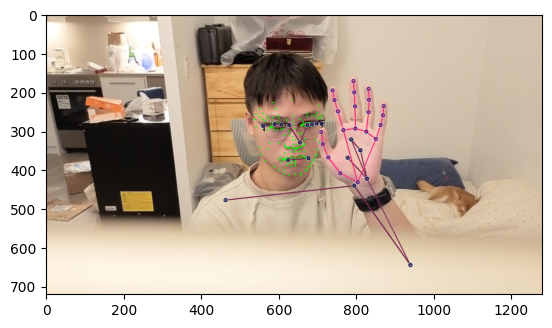

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [114]:
len(results.left_hand_landmarks.landmark)

21

In [56]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [57]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [65]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)  # 如果没有检测到面部，返回全 0 的数组


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [66]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [67]:
result_test = extract_keypoints(results)

In [68]:
result_test

array([ 0.52274555,  0.45816842, -0.59193099, ...,  0.        ,
        0.        ,  0.        ])

In [115]:
468*3+33*4+21*3+21*3

1662

In [74]:
np.save('C:/Users/Bill/Desktop/Ece496/data/result_test', result_test)


: 

In [71]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [159]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
import cv2
import time
import os
import numpy as np

def record_action(root_folder, action_name, user_name, repeat_count=5, record_duration=3.5, countdown_duration=2, frame_width=1920, frame_height=1080, fps=30):
  
    # 在根文件夹路径下创建 custom_data 文件夹及动作子文件夹
    action_folder = os.path.join(root_folder, 'custom_data', action_name)
    os.makedirs(action_folder, exist_ok=True)

    # 初始化摄像头
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)
    frame_count = int(fps * record_duration)

    for count in range(1, repeat_count + 1):
        # 文件名格式: 动作_计数_用户名.mp4
        video_filename = f"{action_name}_{count}_{user_name}.mp4"
        video_filepath = os.path.join(action_folder, video_filename)
        out = cv2.VideoWriter(video_filepath, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

        print(f"准备录制 {action_name} 动作，计数：{count}，保存到：{video_filepath}")

        # 倒计时黑屏
        for i in range(countdown_duration, 0, -1):
            black_frame = cv2.rectangle(np.zeros((frame_height, frame_width, 3), dtype=np.uint8), (0, 0), (frame_width, frame_height), (0, 0, 0), -1)
            cv2.putText(black_frame, f"Get Ready: {i}", (frame_width // 2 - 100, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4)
            cv2.putText(black_frame, f"{action_name} | Count: {count}", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.imshow('Recording', black_frame)
            cv2.waitKey(1000)

        print("开始录制...")
        for _ in range(frame_count):
            ret, frame = cap.read()
            if not ret:
                print("无法捕获视频帧。")
                break
            # 绘制绿色边框
            thickness = 10
            cv2.rectangle(frame, (0, 0), (frame_width, frame_height), (0, 255, 0), thickness)
            cv2.putText(frame, f"{action_name} | Count: {count}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            out.write(frame)
            # 实时显示画面
            cv2.imshow('Recording', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):  # 按 'q' 键可提前停止录制
                break

        # 释放资源
        out.release()
        print(f"视频已保存至：{video_filepath}")

    cap.release()
    cv2.destroyAllWindows()

准备录制 wave 动作，计数：1，保存到：I:/Ece496\custom_data\wave\wave_1_Bill.mp4
开始录制...
视频已保存至：I:/Ece496\custom_data\wave\wave_1_Bill.mp4
准备录制 wave 动作，计数：2，保存到：I:/Ece496\custom_data\wave\wave_2_Bill.mp4
开始录制...
视频已保存至：I:/Ece496\custom_data\wave\wave_2_Bill.mp4
准备录制 wave 动作，计数：3，保存到：I:/Ece496\custom_data\wave\wave_3_Bill.mp4
开始录制...
视频已保存至：I:/Ece496\custom_data\wave\wave_3_Bill.mp4


In [1]:
record_action(
    root_folder='I:/Ece496',   # 根文件夹路径
    action_name='hello',        # 动作名称
    user_name='Bill',          # 用户名
    repeat_count=10             # 循环录制次数
)

NameError: name 'record_action' is not defined

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [163]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [65]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [66]:
np.array(sequences).shape

(90, 30, 1662)

In [67]:
np.array(labels).shape

(90,)

In [68]:
X = np.array(sequences)

In [69]:
X.shape

(90, 30, 1662)

In [70]:
y = to_categorical(labels).astype(int)

In [ ]:
y

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [73]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [12]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [196]:
res = model.predict(X_test)

In [213]:
actions[np.argmax(res[4])]

'hello'

In [214]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [216]:
model.save('action.h5')

In [217]:
del model

In [15]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [90]:
yhat = model.predict(X_test)

In [91]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [92]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [93]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [21]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

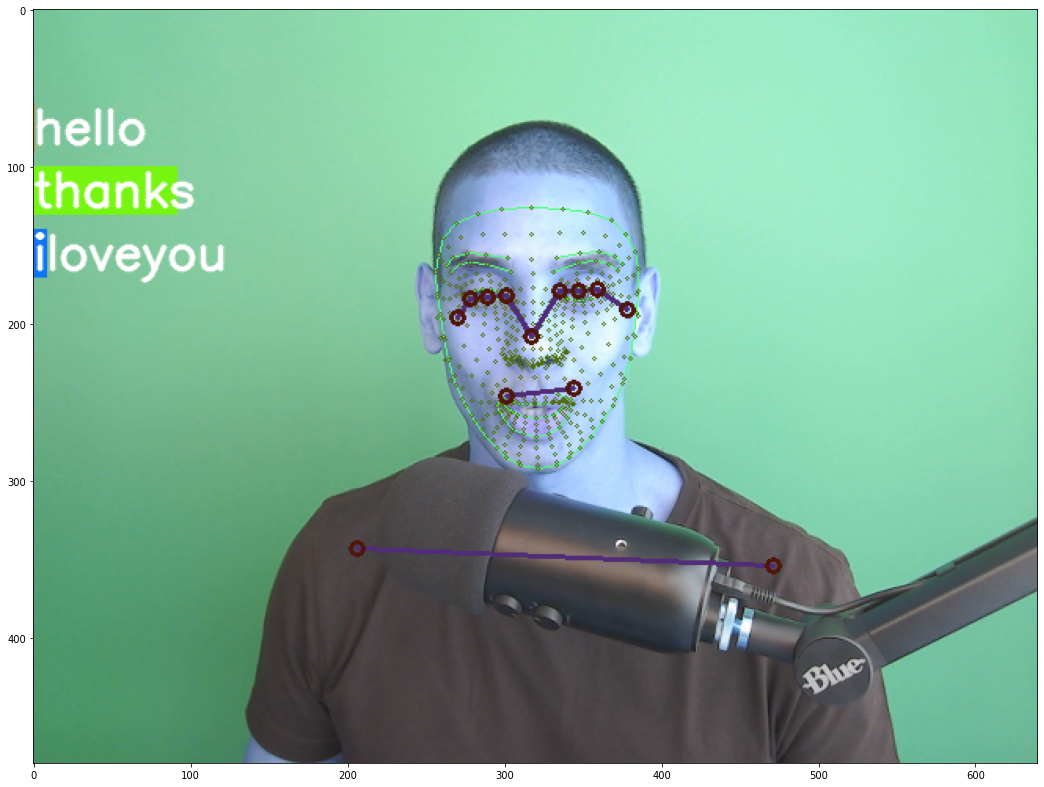

In [262]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [19]:
sequence.reverse()

In [23]:
len(sequence)

1

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)